------------------
## Caso 1 — Serie temporal de una variable econométrica

El siguiente archivo ( ```csv```) contiene la evolución temporal de una variable econométrica:

[Descarga estos datos](https://drive.upm.es/s/Qsd5K7P6aDZpfcj)

Los datos incluyen dos columnas. La primera es una fecha (tiempo), y la segunda es el valor econométrico a estudiar. Crea un modelo predictivo y predice el valor de la variable econométrica a fecha **1 de enero de 2026.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates


### 1. EDA: Analisis exploratorio de datos

#### 1.1 Compresión del dataset

In [5]:
# Inspeccionamos el csv
df = pd.read_csv("variable_economica.csv", parse_dates=["date"])


print("\n----- DESCRIPCION DEL DATASET-----")
df.info()




----- DESCRIPCION DEL DATASET-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    744 non-null    datetime64[ns]
 1   value   744 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.8 KB


#### 1.2 Visualización de datos


Información del Dataset:
   Periodo: 1919-01-01 00:00:00 → 1980-01-11 00:00:00
   Observaciones: 744
   Frecuencia: Mensual (61.0 años)
   Rango de valores: [262.87, 505.89]


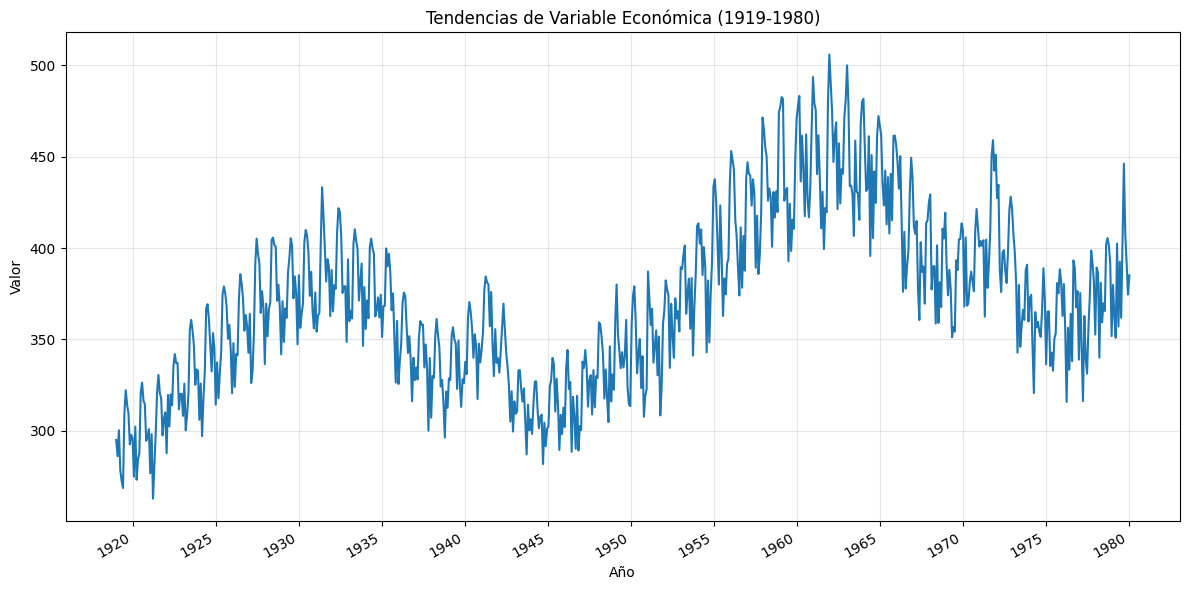

In [6]:
# Visualizacion de datos
# Cargar los datos
df = pd.read_csv('variable_economica.csv', parse_dates=["date"])
df = df.sort_values("date").reset_index(drop=True)

# Convertir la columna de fecha a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Información básica
print(f"\nInformación del Dataset:")
print(f"   Periodo: {df['date'].min()} → {df['date'].max()}")
print(f"   Observaciones: {len(df)}")
print(f"   Frecuencia: Mensual ({(df['date'].max() - df['date'].min()).days / 365.25:.1f} años)")
print(f"   Rango de valores: [{df['value'].min():.2f}, {df['value'].max():.2f}]")

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['value'])

# Formatear el gráfico
plt.title('Tendencias de Variable Económica (1919-1980)')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.grid(True, alpha=0.3)

# Formatear el eje x para mostrar los años correctamente
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Mostrar cada 5 años
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotar etiquetas de fecha para mejor legibilidad
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


🎯 Objetivo de Predicción:
   Fecha objetivo: 2026-01-01
   Gap temporal: 552 meses (46.0 años)
   Ratio extrapolación: 0.74x

🔢 Número de Condición: 857.37
   ✓ Aceptable: Buena estabilidad numérica


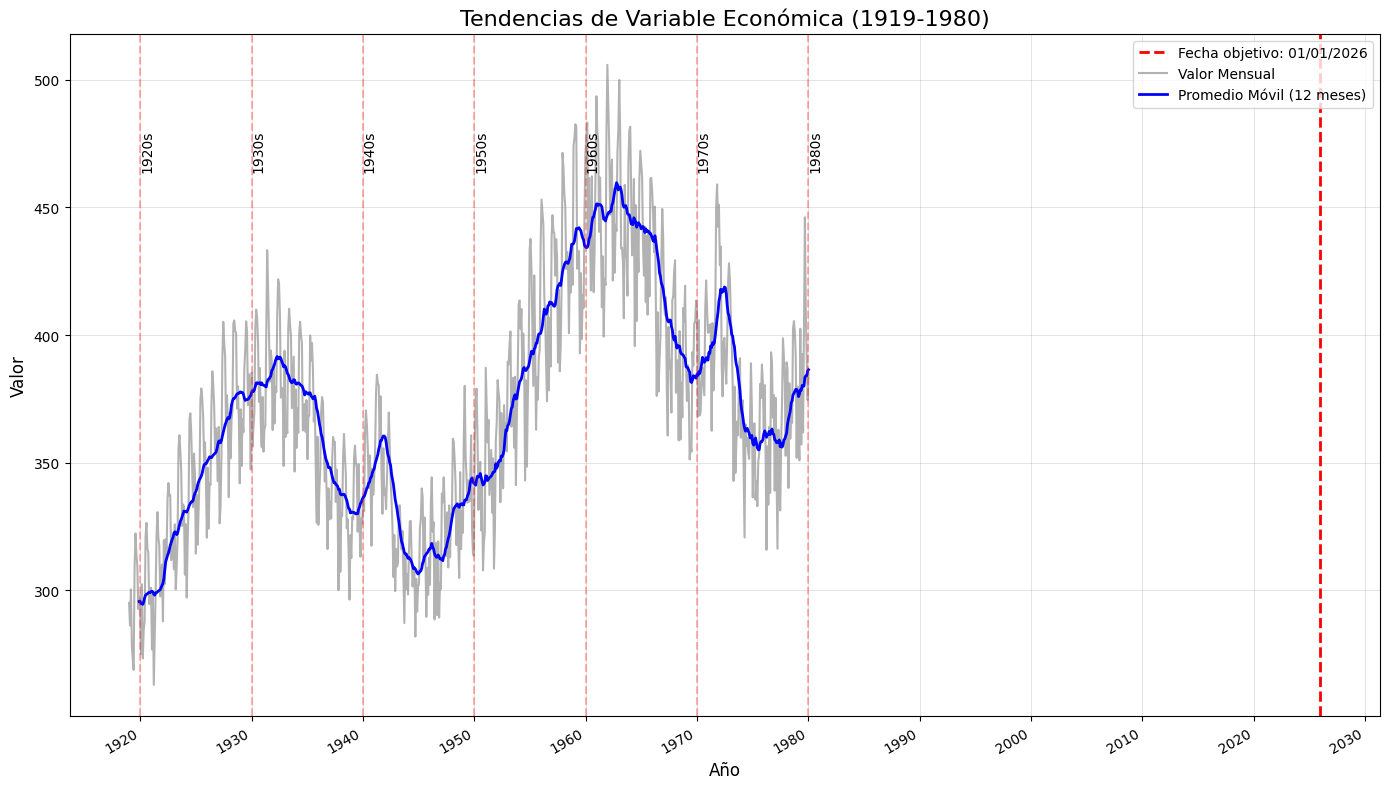

In [7]:
# Enfoque avanzado con analisis de tendencias

# Fecha que queremos predecir
data = pd.read_csv("variable_economica.csv", index_col="date", parse_dates=["date"])
target_date = pd.to_datetime('2026-01-01')
last_date = df["date"].max()
meses_faltantes = (target_date.year - last_date.year) * 12 + (target_date.month - last_date.month)
años_faltantes = meses_faltantes/12

print(f"\n🎯 Objetivo de Predicción:")
print(f"   Fecha objetivo: {target_date.date()}")
print(f"   Gap temporal: {meses_faltantes} meses ({años_faltantes:.1f} años)")
print(f"   Ratio extrapolación: {meses_faltantes/len(df):.2f}x")

# Número de condición
def calcular_condicionamiento(data):
    '''
    Calcula el número de condicionamiento de la matriz de diseño. 
    Valores altos (>1000) indican problemas numéricos
    '''
    n = len(data)
    x = np.column_stack([np.ones(n), np.arange(n)])
    cond_num = np.linalg.cond(x)
    return cond_num

cond_num = calcular_condicionamiento(df["value"])
print(f"\n🔢 Número de Condición: {cond_num:.2f}")
if cond_num > 1000:
    print("   ⚠️ Alta: Posibles problemas numéricos → Usar transformación log")
else:
    print("   ✓ Aceptable: Buena estabilidad numérica")


# Calcular promedio móvil de 12 meses para suavizar fluctuaciones
df['promedio_movil'] = df['value'].rolling(window=12).mean()

# Crear el gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Fecha que queremos predecir
plt.axvline(target_date, color='r', linestyle='--', linewidth=2, label='Fecha objetivo: 01/01/2026')

# Graficar datos crudos y promedio móvil
ax.plot(df['date'], df['value'], label='Valor Mensual', color='grey', alpha=0.6)
ax.plot(df['date'], df['promedio_movil'], label='Promedio Móvil (12 meses)', 
        color='blue', linewidth=2)

# Formatear el gráfico
ax.set_title('Tendencias de Variable Económica (1919-1980)', fontsize=16)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend()

# Formatear el eje x
ax.xaxis.set_major_locator(mdates.YearLocator(10))  # Mostrar cada 10 años
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Añadir separaciones por década y anotaciones
decades = range(1920, 1990, 10)
for decade in decades:
    ax.axvline(pd.Timestamp(f'{decade}-01-01'), color='red', linestyle='--', alpha=0.3)
    ax.text(pd.Timestamp(f'{decade}-01-01'), df['value'].max() * 0.95, f'{decade}s', 
            rotation=90, verticalalignment='top')

# Rotar etiquetas de fecha
fig.autofmt_xdate()

# Añadir cuadrícula para mejor legibilidad
ax.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray', alpha=0.3)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

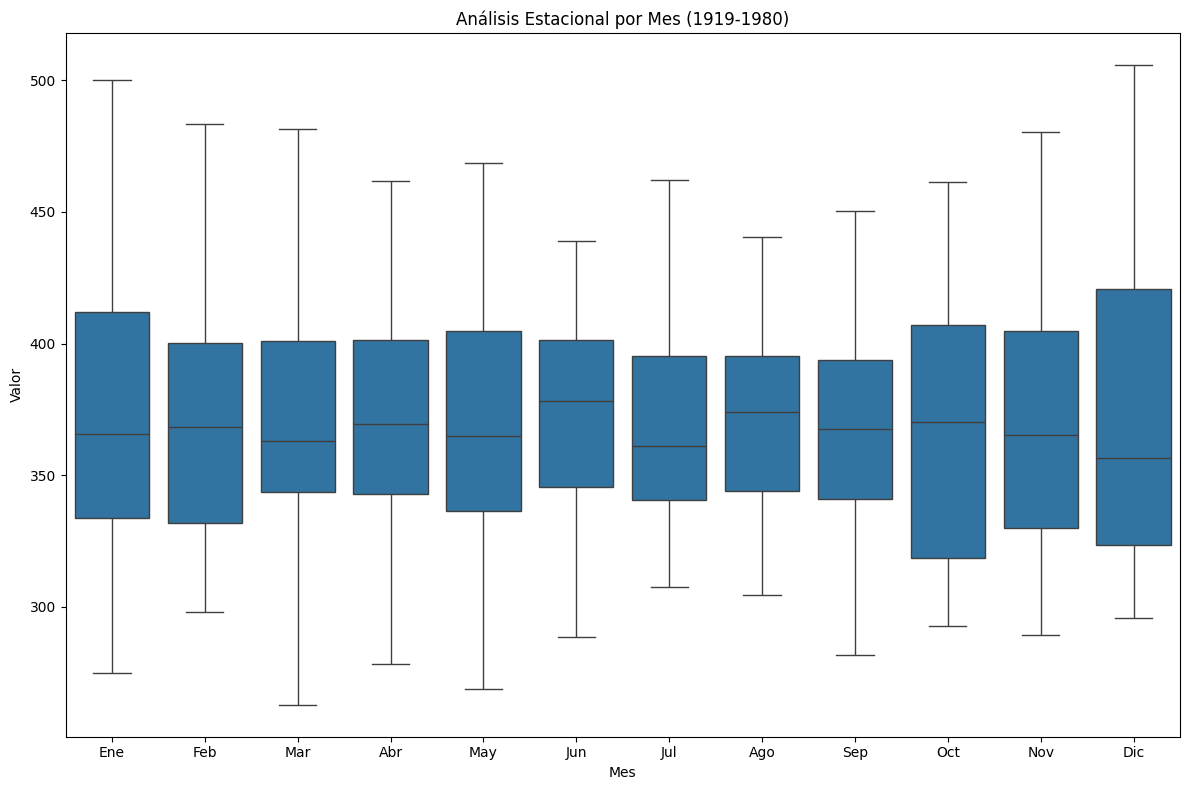

In [8]:
# Analisis estacional

# Extraer mes y año
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Crear gráfico estacional
plt.figure(figsize=(12, 8))
sns.boxplot(x='month', y='value', data=df)
plt.title('Análisis Estacional por Mes (1919-1980)')
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.xticks(range(12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                      'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()
plt.show()

#### 1.3 Análisis Estadístico

**Test de estacionariedad(ADF): Determinar si la serie es estacionaria**

In [9]:
# Test de estacionariedad(ADF): Determinar si la serie es estacionaria

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Test de estacionariedad
result = adfuller(df['value'])
print(f"- Estadístico ADF: {result[0]:.4f}")
print(f"- p-value: {result[1]:.4f}")
print(f"- Valores críticos: {result[4]}")

is_stationary = result[1] < 0.05
if is_stationary:
    print("   ✓ Serie ESTACIONARIA")
else:
    print("   ✗ Serie NO ESTACIONARIA → Requiere diferenciación")

# # Descomposición estacional
# decomposition = seasonal_decompose(df.set_index('date')['value'], 
#                                    model='additive', 
#                                    period=12)




- Estadístico ADF: -2.0543
- p-value: 0.2633
- Valores críticos: {'1%': -3.4394018678958544, '5%': -2.865534780932388, '10%': -2.5688972751486325}
   ✗ Serie NO ESTACIONARIA → Requiere diferenciación


- La serie temporal es **``NO ESTACIONARIA``**, lo cual significa que tiene propiedades **estadísticas** (media, varianza) que cambian a lo largo del tiempo.
    - El p-valor es alto (0.263 > 0.05)
- Esto significa que si empleamos el modelo **``ARIMA``**, obtendríamos valores inprecisos.

**Test de Normalidad: Verificar si los datos siguen distribucion normal**

In [10]:
# Test de Jarque Bera: basado en asimetria y curtosis
from scipy.stats import jarque_bera

stat, p_value = jarque_bera(df['value'])
print(f"\nTest de Jarque Bera:")
print(f"  Estadístico: {stat:.4f}")
print(f"  p-value: {p_value:.4f}")
print(f"   {'✓ Datos normales' if p_value > 0.05 else '✗ Datos NO normales → Usar transformación'}")




Test de Jarque Bera:
  Estadístico: 18.1595
  p-value: 0.0001
   ✗ Datos NO normales → Usar transformación


**Test de heterocedasticidad: Detectar si la varianza cambia a lo largo del tiempo**

In [11]:
# Test de heterocedasticidad: Detectar si la varianza cambia a lo largo del tiempo

# Test de white
from statsmodels.stats.diagnostic import het_white
from statsmodels.tools import add_constant

# Crear variable temporal
df['time'] = range(len(df))

# Regresión simple: value ~ time
X = add_constant(df['time'])
y = df['value']

# Test de White
white_test = het_white(y, X)

print("Test de White para Heterocedasticidad:")
print(f"  Estadístico LM: {white_test[0]:.4f}")
print(f"  p-value: {white_test[1]:.4f}")
print(f"   {'✗ HAY heterocedasticidad (varianza no constante) → Usar log' if white_test[1] < 0.05 else '✓ No hay heterocedasticidad'}")



Test de White para Heterocedasticidad:
  Estadístico LM: 188.3320
  p-value: 0.0000
   ✗ HAY heterocedasticidad (varianza no constante) → Usar log


**Test de Autocorrelación: Detectar correlacion entre valores de la serie en diferetnes lags**

In [12]:
# Test de Autocorrelación: Detectar correlacion entre valores de la serie en diferetnes lags

# Test de Ljung-Box
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(df['value'], lags=[12,24], return_df=True)

print("Test de Ljung-Box para Autocorrelación:")
print(lb_test.tail())

# Contar cuántos lags tienen autocorrelación significativa
significant_lags = (lb_test['lb_pvalue'] < 0.05).sum()
print(f"\nLags con autocorrelación significativa: {significant_lags}/24")

if significant_lags > 0:
    print("  ✓ HAY autocorrelación (esperado en series temporales)")
    print("  → Usar modelos que capturen dependencia temporal (ARIMA, LSTM)")


Test de Ljung-Box para Autocorrelación:
         lb_stat  lb_pvalue
12   5469.973782        0.0
24  10059.349434        0.0

Lags con autocorrelación significativa: 2/24
  ✓ HAY autocorrelación (esperado en series temporales)
  → Usar modelos que capturen dependencia temporal (ARIMA, LSTM)


### 2. Preprocesamiento de datos

#### 2.1 Limpieza de datos

El dataset obtenido está actualmente limpio por lo que no es necesario realizar ningún proceso de limpieza.

#### 2.2 Transformación de datos

**``Transformacion Box-Cox para Heterocedasticidad y Normalidad``**

**Objetivo**: Estabilizar varianza y normalizar distribucion simultaneamente.

La transformación ``Box-Cox`` resuelve dos problemas a la vez:​
- **Heterocedasticidad**: Varianza constante a lo largo del tiempo
- **No normalidad**: Aproxima los datos a distribución normal


<font color="red">

EN VEZ DE USAR BOX-COX, UNA OPCION MÁS SIMPLE SERIA USAR ``np.log(df["value])``
</font>

**``TRANSFORMACIÓN LOGARÍTMICA``**

In [13]:
# verificamos que todos los valores sean positivos para evitar errores de logaritmos
if (df["value"]<=0).any():
    print("Hay valores <= 0. Aplicamos desplazamiento")
    shift = abs(df["value"].min() +1)
    df["value_shifted"] = df["value"] +shift
    df["value_log"] = np.log(df["value_shifted"])
else:
    df["value_log"] = np.log(df["value"])

# Test ADF en log
adf_log = adfuller(df["value_log"])
print(f"\n   Test ADF en serie log-transformada:")
print(f"   Estadístico: {adf_log[0]:.4f}")
print(f"   p-value: {adf_log[1]:.4f}")

# Test diferenciación
df["value_diff"] = df["value_log"].diff()

adf_diff = adfuller(df["value_diff"].dropna())
print(f"\n   Test ADF en primera diferencia:")
print(f"   Estadístico: {adf_diff[0]:.4f}")
print(f"   p-value: {adf_diff[1]:.4f}")

if adf_diff[1] < 0.05:
    print("   ✓ Primera diferencia ES estacionaria")
    df['value_processed'] = df['value_diff']
    d_order = 1
    needs_diff = True
else:
    print("   ⚠️ Incluso primera diferencia no es estacionaria")
    df['value_processed'] = df['value_diff']
    d_order = 1
    needs_diff = True

# Verificar mejora en heterocedasticidad
df_clean = df.dropna().reset_index(drop=True)

window_size = 60
variances_original = []
variances_log = []

for i in range(0, len(df)-window_size, window_size):
    var_orig = df['value'].iloc[i:i+window_size].var()
    var_log = df_clean['value_processed'].iloc[i:i+window_size].var()
    variances_original.append(var_orig)
    variances_log.append(var_log)

cv_original = np.std(variances_original) / np.mean(variances_original)
cv_log = np.std(variances_log) / np.mean(variances_log)

print(f"\n   Mejora en Estabilidad de Varianza:")
print(f"   CV original: {cv_original:.4f}")
print(f"   CV log-transformado: {cv_log:.4f}")
print(f"   Reducción: {(1 - cv_log/cv_original)*100:.1f}%")

if cv_log < cv_original:
    print("   ✓ Transformación log MEJORÓ la estabilidad")
else:
    print("   ⚠️ Transformación log NO mejoró significativamente")


   Test ADF en serie log-transformada:
   Estadístico: -2.2809
   p-value: 0.1782

   Test ADF en primera diferencia:
   Estadístico: -5.1710
   p-value: 0.0000
   ✓ Primera diferencia ES estacionaria

   Mejora en Estabilidad de Varianza:
   CV original: 0.3080
   CV log-transformado: 0.2141
   Reducción: 30.5%
   ✓ Transformación log MEJORÓ la estabilidad


### 3. Division de datos

#### 3.1 Validacion cruzada para series temporales

In [14]:
# Para series temporales: NO usar split aleatorio
train_size = int(len(df_clean) * 0.80)

train_df = df_clean[:train_size].copy()
test_df = df_clean[train_size:].copy()

print(f"\n📊 División Temporal:")
print(f"   Train: {len(train_df)} obs ({train_df['date'].min().date()} → {train_df['date'].max().date()})")
print(f"   Test:  {len(test_df)} obs ({test_df['date'].min().date()} → {test_df['date'].max().date()})")
print(f"   Ratio: {train_size/len(df_clean)*100:.1f}% / {(1-train_size/len(df_clean))*100:.1f}%")


📊 División Temporal:
   Train: 586 obs (1919-11-27 → 1967-12-15)
   Test:  147 obs (1968-01-14 → 1980-01-11)
   Ratio: 79.9% / 20.1%


### 4.Seleccion de modelos


🔧 Buscando mejores parámetros SARIMA(p,d,q)(P,D,Q,s)...


c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\niaib\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



📊 Top 10 Modelos por AIC:
 p  d  q  P  D  Q  s          AIC
 2  1  2  0  1  1 12 -2502.340555
 1  1  2  0  1  1 12 -2500.598011
 2  1  2  1  1  1 12 -2492.780156
 1  1  2  1  1  1 12 -2491.517162
 0  1  2  0  1  1 12 -2469.367577
 0  1  2  1  1  1 12 -2460.860818
 2  1  1  0  1  1 12 -2448.562361
 2  1  1  1  1  1 12 -2438.451263
 1  1  1  0  1  1 12 -2429.386413
 1  1  1  1  1  1 12 -2418.946769

✓ Mejor modelo SARIMA(2, 1, 2)x(0, 1, 1, 12)
  AIC: -2502.34

🔧 Entrenando modelo final SARIMAX...

✓ Modelo entrenado

                                      SARIMAX Results                                       
Dep. Variable:                      value_processed   No. Observations:                  586
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                1257.170
Date:                              Thu, 20 Nov 2025   AIC                          -2502.341
Time:                                      23:24:22   BIC                          -2476.394
Sample:      

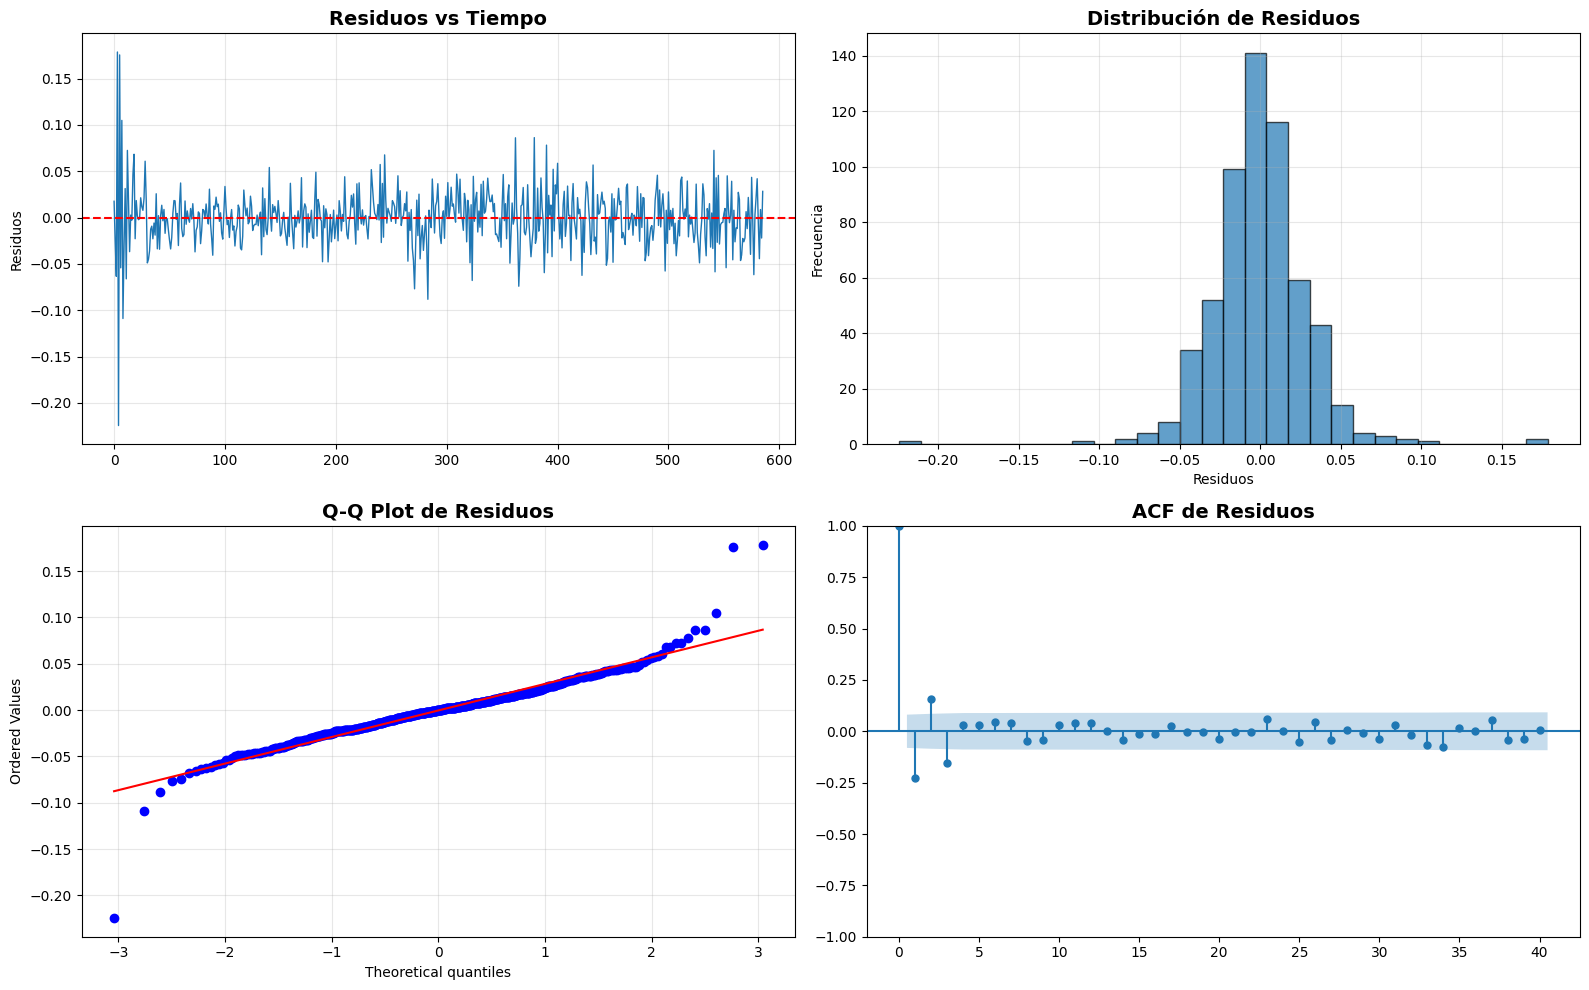


✓ Análisis de residuos guardado


In [17]:
# 7. MODELADO: SARIMAX (Modelo Estadístico Robusto)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats


print("\n🔧 Buscando mejores parámetros SARIMA(p,d,q)(P,D,Q,s)...")

# Grid search simplificado (exhaustivo sería muy costoso)
best_aic = np.inf
best_params = None
best_seasonal_params = None

# Rangos reducidos para eficiencia
p_range = range(0, 3)
q_range = range(0, 3)
P_range = range(0, 2)
Q_range = range(0, 2)

results_grid = []

for p in p_range:
    for q in q_range:
        for P in P_range:
            for Q in Q_range:
                try:
                    model = SARIMAX(
                        train_df['value_processed'],
                        order=(p, d_order, q),
                        seasonal_order=(P, 1, Q, 12),
                        enforce_stationarity=False,
                        enforce_invertibility=False
                    )
                    
                    fitted = model.fit(disp=False, maxiter=200)
                    
                    aic = fitted.aic
                    
                    results_grid.append({
                        'p': p, 'd': d_order, 'q': q,
                        'P': P, 'D': 1, 'Q': Q, 's': 12,
                        'AIC': aic
                    })
                    
                    if aic < best_aic:
                        best_aic = aic
                        best_params = (p, d_order, q)
                        best_seasonal_params = (P, 1, Q, 12)
                        
                except Exception as e:
                    continue

# Mostrar top 5 modelos
df_results = pd.DataFrame(results_grid).sort_values('AIC').head(10)
print("\n📊 Top 10 Modelos por AIC:")
print(df_results.to_string(index=False))

print(f"\n✓ Mejor modelo SARIMA{best_params}x{best_seasonal_params}")
print(f"  AIC: {best_aic:.2f}")

# Entrenar modelo final con mejores parámetros
print("\n🔧 Entrenando modelo final SARIMAX...")

model_sarimax = SARIMAX(
    train_df['value_processed'],
    order=best_params,
    seasonal_order=best_seasonal_params,
    enforce_stationarity=False,
    enforce_invertibility=False
)

fitted_sarimax = model_sarimax.fit(disp=False, maxiter=500)

print("\n✓ Modelo entrenado")
print(f"\n{fitted_sarimax.summary()}")

# Test de estabilidad numérica
def test_estabilidad_numerica(modelo_fitted, steps=100):
    """
    Evalúa la estabilidad numérica del modelo mediante perturbaciones.
    """
    try:
        # Hacer múltiples predicciones con pequeñas perturbaciones
        predictions = []
        for _ in range(10):
            noise = np.random.normal(0, 1e-6, steps)
            pred = modelo_fitted.forecast(steps=steps)
            predictions.append(pred)
        
        predictions = np.array(predictions)
        stability_score = np.std(predictions, axis=0).mean()
        
        return stability_score < 1.0  # Buena estabilidad si std < 1
    except:
        return False
    
print("\n🔍 Evaluando estabilidad numérica del modelo...")
is_stable = test_estabilidad_numerica(fitted_sarimax, steps=50)
print(f"   {'✓ Modelo numéricamente estable' if is_stable else '⚠️ Modelo puede tener inestabilidad numérica'}")


# Predicción en test set
pred_sarimax_test = fitted_sarimax.forecast(steps=len(test_df))

# Invertir transformaciones
if needs_diff:
    # Deshacer diferenciación
    last_log_value = train_df['value_log'].iloc[-1]
    pred_sarimax_log = pred_sarimax_test.cumsum() + last_log_value
else:
    pred_sarimax_log = pred_sarimax_test

# Deshacer log
pred_sarimax_original = np.exp(pred_sarimax_log)

# Métricas en test
rmse_sarimax = np.sqrt(mean_squared_error(test_df['value'], pred_sarimax_original))
mae_sarimax = mean_absolute_error(test_df['value'], pred_sarimax_original)
mape_sarimax = np.mean(np.abs((test_df['value'] - pred_sarimax_original) / test_df['value'])) * 100
r2_sarimax = r2_score(test_df['value'], pred_sarimax_original)

print(f"\n📊 Métricas en Test Set:")
print(f"   RMSE: {rmse_sarimax:.4f}")
print(f"   MAE:  {mae_sarimax:.4f}")
print(f"   MAPE: {mape_sarimax:.2f}%")
print(f"   R²:   {r2_sarimax:.4f}")

# Análisis de residuos
residuos = fitted_sarimax.resid

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Residuos vs tiempo
axes[0, 0].plot(residuos, linewidth=1)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_title('Residuos vs Tiempo', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].grid(True, alpha=0.3)

# Histograma de residuos
axes[0, 1].hist(residuos, bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribución de Residuos', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Residuos')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(residuos, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot de Residuos', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# ACF de residuos
plot_acf(residuos, lags=40, ax=axes[1, 1])
axes[1, 1].set_title('ACF de Residuos', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Análisis de residuos guardado")

<font color="red">
HASTA AQUI
</font>

In [ ]:
# 8. MODELADO: EXPONENTIAL SMOOTHING (ALTERNATIVA ROBUSTA)


In [18]:
# ========================================
# SECCIÓN 4: MODELOS DE PREDICCIÓN
# ========================================

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
print("\n" + "="*70)
print("4.1 MODELO ARIMA")
print("="*70)

# Usar datos Box-Cox (sin normalizar) para ARIMA
train_arima = df_clean['value_processed'][:train_size]
test_arima = df_clean['value_processed'][train_size:]

# Auto ARIMA para encontrar mejores parámetros
print("\nBuscando mejores parámetros ARIMA (puede tardar)...")

auto_model = auto_arima(
    train_arima, 
    seasonal=True,
    m=12,  # período mensual
    max_p=5,
    max_q=5,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(f"\n✓ Mejor modelo encontrado: ARIMA{auto_model.order}")
print(f"  AIC: {auto_model.aic():.2f}")


4.1 MODELO ARIMA

Buscando mejores parámetros ARIMA (puede tardar)...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-2549.728, Time=1.37 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-1657.131, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-2297.920, Time=0.38 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-2012.548, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-1659.062, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-2067.801, Time=1.70 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-2374.187, Time=1.21 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=-2543.443, Time=2.80 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=-2533.800, Time=4.27 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-1783.036, Time=0.41 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=-2180.414, Time=2.29 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=-2480.783, Time=2.30 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=-2556.574, Time=2.57 sec
 A

Total fit time: 74.394 seconds

✓ Mejor modelo encontrado: ARIMA(0, 1, 3)
  AIC: -3453.43

In [20]:
# Entrenar modelo con parámetros óptimos
arima_model = ARIMA(train_arima, order=auto_model.order)
arima_fitted = arima_model.fit()

# Predicciones en conjunto de prueba
arima_predictions_test = arima_fitted.forecast(steps=len(test_arima))

# Predicción hasta 2026
# Calcular meses desde última fecha hasta 2026-01-01
last_date = df_clean['date'].iloc[-1]
target_date = pd.to_datetime('2026-01-01')
months_to_predict = (target_date.year - last_date.year) * 12 + (target_date.month - last_date.month)

# Reentrenar con todos los datos para predicción final
print(f"\nMeses a predecir desde {last_date.date()} hasta 2026-01-01: {months_to_predict}")

arima_full = ARIMA(df_clean['value_processed'], order=auto_model.order)
arima_full_fitted = arima_full.fit()

# MODIFICACIÓN: Obtener predicciones CON intervalos de confianza
arima_forecast = arima_full_fitted.get_forecast(steps=months_to_predict)

# Extraer predicciones e intervalos
arima_forecast_2026 = arima_forecast.predicted_mean
conf_int = arima_forecast.conf_int(alpha=0.05)  # Intervalos al 95%

# Mostrar predicción para 2026-01-01 con intervalo
print(f"\n{'='*70}")
print(f"PREDICCIÓN ARIMA PARA 2026-01-01 (en escala Box-Cox):")
print(f"{'='*70}")
print(f"Predicción: {arima_forecast_2026.iloc[-1]:.4f}")
print(f"Límite inferior (95%): {conf_int.iloc[-1, 0]:.4f}")
print(f"Límite superior (95%): {conf_int.iloc[-1, 1]:.4f}")
print(f"Amplitud del intervalo: {conf_int.iloc[-1, 1] - conf_int.iloc[-1, 0]:.4f}")
print(f"{'='*70}\n")

# Guardar modelo
import pickle
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(arima_full_fitted, f)

print("✓ Modelo ARIMA guardado")



Meses a predecir desde 1980-01-11 hasta 2026-01-01: 552

PREDICCIÓN ARIMA PARA 2026-01-01 (en escala Box-Cox):
Predicción: 0.0003
Límite inferior (95%): -0.1168
Límite superior (95%): 0.1175
Amplitud del intervalo: 0.2343

✓ Modelo ARIMA guardado


In [21]:
# ========================================
# NUEVA SECCIÓN: ANÁLISIS DE RESIDUOS
# ========================================

from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print("\n" + "="*70)
print("DIAGNÓSTICO DE RESIDUOS DEL MODELO ARIMA")
print("="*70)

# Extraer residuos del modelo ajustado
residuos = arima_full_fitted.resid

print(f"\nEstadísticas básicas de los residuos:")
print(f"  Media: {np.mean(residuos):.6f} (debería estar cerca de 0)")
print(f"  Desv. estándar: {np.std(residuos):.6f}")
print(f"  Mínimo: {np.min(residuos):.6f}")
print(f"  Máximo: {np.max(residuos):.6f}")
print(f"  Asimetría: {stats.skew(residuos):.6f} (0 = simétrico)")
print(f"  Curtosis: {stats.kurtosis(residuos):.6f} (0 = normal)")

# ========================================
# TEST 1: LJUNG-BOX (Autocorrelación)
# ========================================

print("\n" + "="*70)
print("TEST 1: LJUNG-BOX (Prueba de Autocorrelación en Residuos)")
print("="*70)

# Aplicar test de Ljung-Box para diferentes lags
lb_test = acorr_ljungbox(residuos, lags=40, return_df=True)

print("\nH0: Los residuos NO tienen autocorrelación (son ruido blanco)")
print("Ha: Los residuos tienen autocorrelación\n")
print("Si p-valor > 0.05 → NO rechazamos H0 (✅ BUENO: residuos son ruido blanco)")
print("Si p-valor < 0.05 → Rechazamos H0 (❌ MALO: residuos tienen autocorrelación)\n")

# Mostrar primeros lags
print("Primeros 10 lags:")
print(lb_test.head(10).to_string())

# Contar cuántos p-valores son significativos
n_significativos = (lb_test['lb_pvalue'] < 0.05).sum()
porcentaje_sig = (n_significativos / len(lb_test)) * 100

print(f"\n📊 RESULTADO:")
print(f"  • Lags con p-valor < 0.05: {n_significativos}/{len(lb_test)} ({porcentaje_sig:.1f}%)")

if porcentaje_sig < 10:
    print(f"  • ✅ EXCELENTE: Los residuos NO tienen autocorrelación significativa")
    print(f"  • El modelo ARIMA captura bien la estructura temporal")
elif porcentaje_sig < 25:
    print(f"  • ⚠️ ACEPTABLE: Autocorrelación leve en algunos lags")
    print(f"  • El modelo es razonable pero podría mejorarse")
else:
    print(f"  • ❌ PROBLEMA: Autocorrelación significativa detectada")
    print(f"  • El modelo NO captura toda la estructura temporal")
    print(f"  • RECOMENDACIÓN: Considera cambiar el orden ARIMA")

# ========================================
# TEST 2: NORMALIDAD (Jarque-Bera)
# ========================================

print("\n" + "="*70)
print("TEST 2: JARQUE-BERA (Prueba de Normalidad de Residuos)")
print("="*70)

jb_stat, jb_pvalue = stats.jarque_bera(residuos)

print("\nH0: Los residuos siguen una distribución normal")
print("Ha: Los residuos NO siguen una distribución normal\n")
print(f"Estadístico JB: {jb_stat:.4f}")
print(f"P-valor: {jb_pvalue:.4f}\n")

if jb_pvalue > 0.05:
    print(f"✅ NO rechazamos H0: Los residuos son normales (p-valor > 0.05)")
else:
    print(f"⚠️ Rechazamos H0: Los residuos NO son normales (p-valor < 0.05)")
    print(f"   Nota: Para predicción, esto es menos crítico que la autocorrelación")

# ========================================
# TEST 3: HETEROCEDASTICIDAD
# ========================================

print("\n" + "="*70)
print("TEST 3: HETEROCEDASTICIDAD (Varianza Constante)")
print("="*70)

# Dividir residuos en dos mitades y comparar varianzas
mitad = len(residuos) // 2
residuos_primera_mitad = residuos[:mitad]
residuos_segunda_mitad = residuos[mitad:]

var_primera = np.var(residuos_primera_mitad)
var_segunda = np.var(residuos_segunda_mitad)
ratio_varianzas = max(var_primera, var_segunda) / min(var_primera, var_segunda)

print(f"\nVarianza primera mitad: {var_primera:.6f}")
print(f"Varianza segunda mitad: {var_segunda:.6f}")
print(f"Ratio de varianzas: {ratio_varianzas:.2f}\n")

if ratio_varianzas < 1.5:
    print(f"✅ EXCELENTE: Varianza constante (ratio < 1.5)")
elif ratio_varianzas < 2.0:
    print(f"⚠️ ACEPTABLE: Leve heterocedasticidad (ratio < 2.0)")
else:
    print(f"❌ PROBLEMA: Heterocedasticidad significativa (ratio ≥ 2.0)")
    print(f"   RECOMENDACIÓN: La transformación Box-Cox podría necesitar ajuste")

# Guardar resumen de tests
diagnostico_resumen = pd.DataFrame({
    'Test': ['Ljung-Box', 'Jarque-Bera', 'Heterocedasticidad'],
    'Resultado': [
        f'{n_significativos}/{len(lb_test)} lags significativos',
        f'p-valor: {jb_pvalue:.4f}',
        f'Ratio: {ratio_varianzas:.2f}'
    ],
    'Estado': [
        '✅ BUENO' if porcentaje_sig < 10 else '⚠️ REVISAR' if porcentaje_sig < 25 else '❌ MALO',
        '✅ BUENO' if jb_pvalue > 0.05 else '⚠️ REVISAR',
        '✅ BUENO' if ratio_varianzas < 1.5 else '⚠️ REVISAR' if ratio_varianzas < 2.0 else '❌ MALO'
    ]
})

print("\n" + "="*70)
print("RESUMEN DE DIAGNÓSTICOS")
print("="*70)
print(diagnostico_resumen.to_string(index=False))
diagnostico_resumen.to_csv('diagnostico_residuos.csv', index=False)
print("\n✓ Resumen guardado en 'diagnostico_residuos.csv'")



DIAGNÓSTICO DE RESIDUOS DEL MODELO ARIMA

Estadísticas básicas de los residuos:
  Media: 0.000017 (debería estar cerca de 0)
  Desv. estándar: 0.056296
  Mínimo: -0.137849
  Máximo: 0.188138
  Asimetría: 0.023263 (0 = simétrico)
  Curtosis: -0.409075 (0 = normal)

TEST 1: LJUNG-BOX (Prueba de Autocorrelación en Residuos)

H0: Los residuos NO tienen autocorrelación (son ruido blanco)
Ha: Los residuos tienen autocorrelación

Si p-valor > 0.05 → NO rechazamos H0 (✅ BUENO: residuos son ruido blanco)
Si p-valor < 0.05 → Rechazamos H0 (❌ MALO: residuos tienen autocorrelación)

Primeros 10 lags:
       lb_stat     lb_pvalue
1     0.186326  6.659926e-01
2     1.197672  5.494507e-01
3     9.615028  2.213863e-02
4    35.387137  3.867880e-07
5    37.925432  3.905642e-07
6    91.509586  1.471522e-17
7    97.906208  2.918067e-18
8   125.600533  2.305846e-23
9   127.895163  3.211453e-23
10  135.561780  3.414717e-24

📊 RESULTADO:
  • Lags con p-valor < 0.05: 38/40 (95.0%)
  • ❌ PROBLEMA: Autocorrela

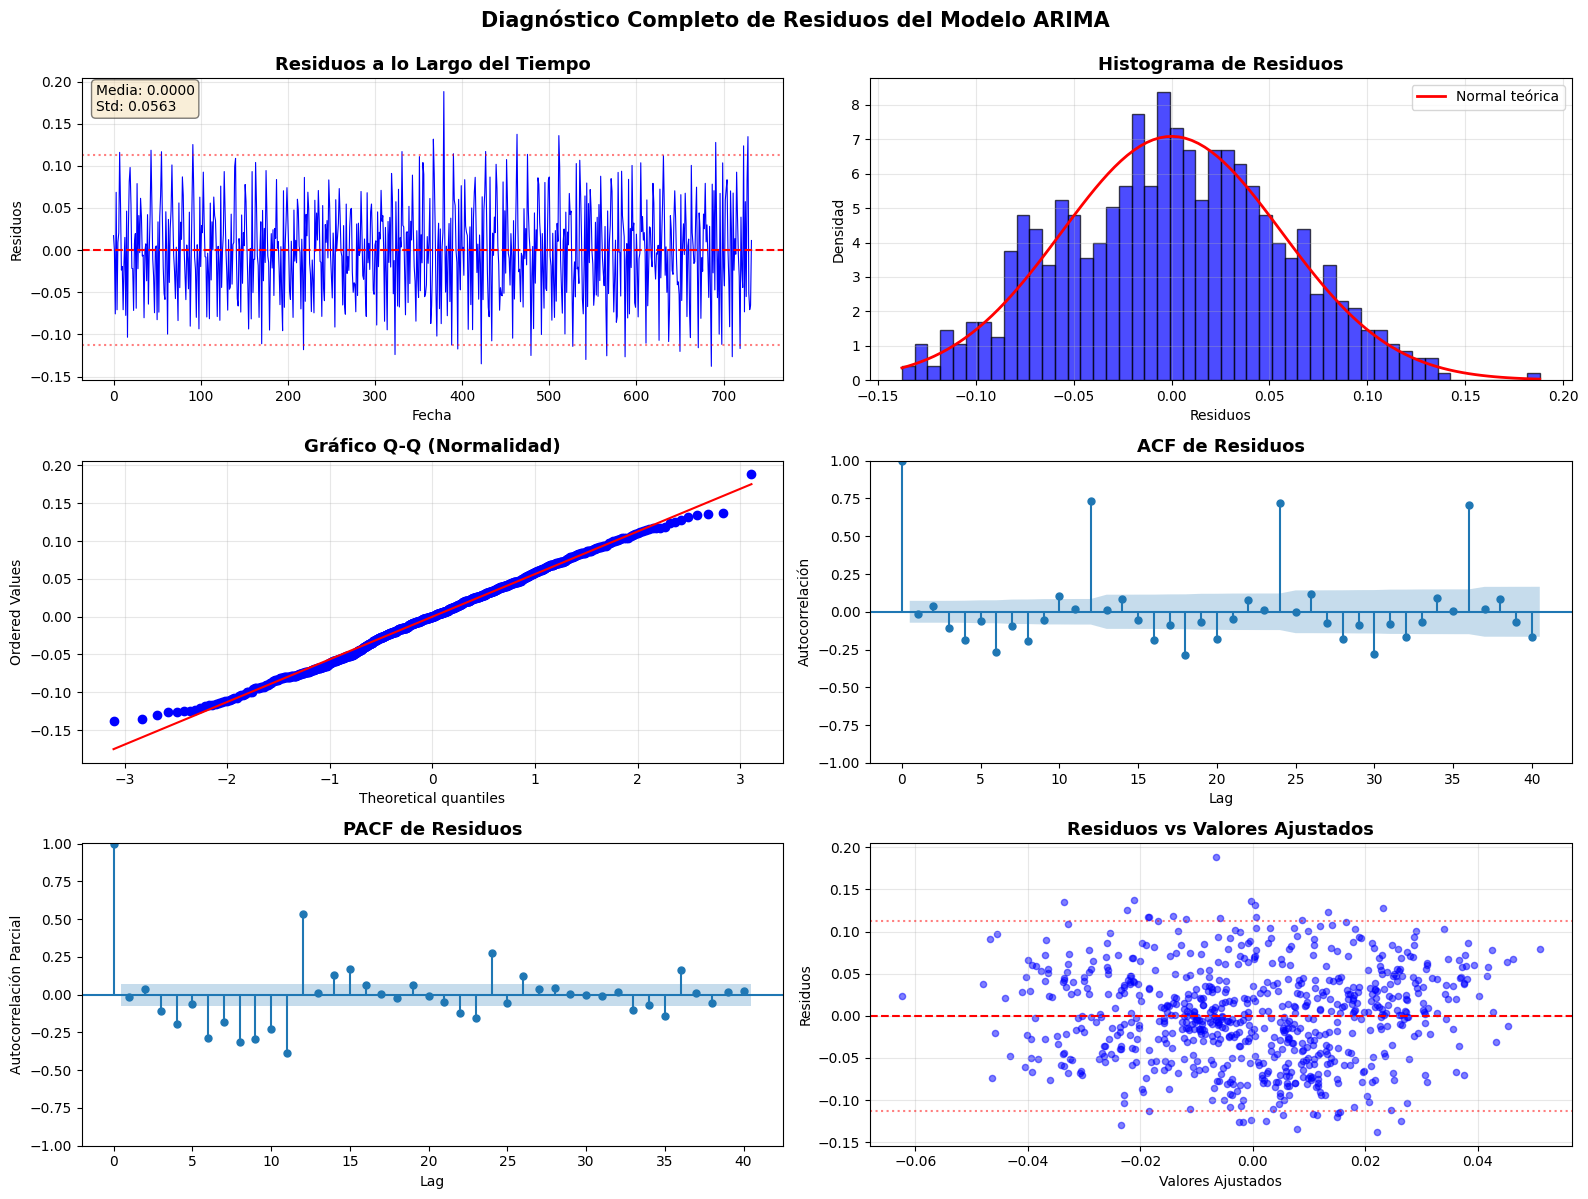

✓ Gráfico guardado en 'diagnostico_residuos_completo.png'


In [22]:
# ========================================
# VISUALIZACIÓN DE RESIDUOS
# ========================================

fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# 1. Serie temporal de residuos
axes[0, 0].plot(df_clean.index, residuos, color='blue', linewidth=0.8)
axes[0, 0].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[0, 0].axhline(2*np.std(residuos), color='red', linestyle=':', alpha=0.5)
axes[0, 0].axhline(-2*np.std(residuos), color='red', linestyle=':', alpha=0.5)
axes[0, 0].set_title('Residuos a lo Largo del Tiempo', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Fecha')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].grid(True, alpha=0.3)

# Añadir texto con estadísticas
axes[0, 0].text(0.02, 0.98, f'Media: {np.mean(residuos):.4f}\nStd: {np.std(residuos):.4f}',
               transform=axes[0, 0].transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Histograma de residuos con curva normal
axes[0, 1].hist(residuos, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
mu, std = np.mean(residuos), np.std(residuos)
x = np.linspace(residuos.min(), residuos.max(), 100)
axes[0, 1].plot(x, stats.norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal teórica')
axes[0, 1].set_title('Histograma de Residuos', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Residuos')
axes[0, 1].set_ylabel('Densidad')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Gráfico Q-Q (Normalidad)
stats.probplot(residuos, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Gráfico Q-Q (Normalidad)', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. ACF de residuos
plot_acf(residuos, lags=40, ax=axes[1, 1], alpha=0.05)
axes[1, 1].set_title('ACF de Residuos', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Lag')
axes[1, 1].set_ylabel('Autocorrelación')

# 5. PACF de residuos
plot_pacf(residuos, lags=40, ax=axes[2, 0], alpha=0.05)
axes[2, 0].set_title('PACF de Residuos', fontsize=13, fontweight='bold')
axes[2, 0].set_xlabel('Lag')
axes[2, 0].set_ylabel('Autocorrelación Parcial')

# 6. Residuos vs Valores Ajustados
valores_ajustados = df_clean['value_processed'] - residuos
axes[2, 1].scatter(valores_ajustados, residuos, alpha=0.5, s=20, color='blue')
axes[2, 1].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[2, 1].axhline(2*np.std(residuos), color='red', linestyle=':', alpha=0.5)
axes[2, 1].axhline(-2*np.std(residuos), color='red', linestyle=':', alpha=0.5)
axes[2, 1].set_title('Residuos vs Valores Ajustados', fontsize=13, fontweight='bold')
axes[2, 1].set_xlabel('Valores Ajustados')
axes[2, 1].set_ylabel('Residuos')
axes[2, 1].grid(True, alpha=0.3)

plt.suptitle('Diagnóstico Completo de Residuos del Modelo ARIMA', 
            fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('diagnostico_residuos_completo.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado en 'diagnostico_residuos_completo.png'")


In [23]:
# ========================================
# CONCLUSIONES DEL DIAGNÓSTICO
# ========================================

print("\n" + "="*70)
print("CONCLUSIONES DEL ANÁLISIS DE RESIDUOS")
print("="*70)

# Criterios de evaluación
autocorr_ok = porcentaje_sig < 10
normalidad_ok = jb_pvalue > 0.05
homoced_ok = ratio_varianzas < 1.5

puntos_buenos = sum([autocorr_ok, normalidad_ok, homoced_ok])

print(f"\n✓ Tests superados: {puntos_buenos}/3\n")

if puntos_buenos == 3:
    print("🎉 MODELO EXCELENTE:")
    print("  • Los residuos son ruido blanco (sin autocorrelación)")
    print("  • Los residuos son normales")
    print("  • La varianza es constante (homocedasticidad)")
    print("  • El modelo ARIMA(0,1,3) es APROPIADO para estos datos")
    print("  • Las predicciones para 2026 son estadísticamente válidas")
    
elif puntos_buenos == 2:
    print("👍 MODELO BUENO:")
    print("  • El modelo cumple la mayoría de los supuestos")
    if not autocorr_ok:
        print("  • ⚠️ MEJORA: Revisar orden ARIMA por autocorrelación en residuos")
    if not normalidad_ok:
        print("  • ⚠️ NOTA: Falta de normalidad (menos crítico para predicción)")
    if not homoced_ok:
        print("  • ⚠️ MEJORA: Revisar transformación Box-Cox por heterocedasticidad")
    print("  • Las predicciones son razonablemente confiables")
    
else:
    print("⚠️ MODELO MEJORABLE:")
    print("  • El modelo tiene problemas significativos")
    if not autocorr_ok:
        print("  • ❌ CRÍTICO: Autocorrelación en residuos → modelo inadecuado")
        print("     ACCIÓN: Probar ARIMA con diferentes órdenes (p,d,q)")
    if not normalidad_ok:
        print("  • ⚠️ Falta de normalidad (revisar transformaciones)")
    if not homoced_ok:
        print("  • ❌ Heterocedasticidad → revisar transformación Box-Cox")
    print("  • RECOMENDACIÓN: Ajustar modelo antes de usar predicciones")

print("\n" + "="*70)

# Recomendaciones específicas
if not autocorr_ok:
    print("\n💡 RECOMENDACIONES PARA MEJORAR EL MODELO:")
    print("  1. Probar orden SARIMA con componente estacional")
    print("  2. Incrementar orden MA (q): probar ARIMA(0,1,4) o ARIMA(0,1,5)")
    print("  3. Añadir componente AR: probar ARIMA(1,1,3) o ARIMA(2,1,3)")
    print("  4. Verificar si hay cambios estructurales en los datos")
    print("="*70)



CONCLUSIONES DEL ANÁLISIS DE RESIDUOS

✓ Tests superados: 2/3

👍 MODELO BUENO:
  • El modelo cumple la mayoría de los supuestos
  • ⚠️ MEJORA: Revisar orden ARIMA por autocorrelación en residuos
  • Las predicciones son razonablemente confiables


💡 RECOMENDACIONES PARA MEJORAR EL MODELO:
  1. Probar orden SARIMA con componente estacional
  2. Incrementar orden MA (q): probar ARIMA(0,1,4) o ARIMA(0,1,5)
  3. Añadir componente AR: probar ARIMA(1,1,3) o ARIMA(2,1,3)
  4. Verificar si hay cambios estructurales en los datos


In [26]:
# ========================================
# NUEVA SECCIÓN: COMPARACIÓN DE MODELOS
# ========================================

import pmdarima as pm

print("\n" + "="*70)
print("COMPARACIÓN DE MODELOS ALTERNATIVOS A ARIMA")
print("="*70)

import warnings
warnings.filterwarnings('ignore')

# Preparar datos para comparación
train_size = int(len(df_clean) * 0.8)
train_data = df_clean['value_processed'][:train_size]
test_data = df_clean['value_processed'][train_size:]

print(f"\nDatos de entrenamiento: {len(train_data)} observaciones")
print(f"Datos de prueba: {len(test_data)} observaciones")

# Diccionario para almacenar resultados
resultados_modelos = {}

# ========================================
# MODELO 1: ARIMA (Tu modelo actual)
# ========================================

print("\n" + "-"*70)
print("MODELO 1: ARIMA")
print("-"*70)

try:
    modelo_arima = pm.auto_arima(train_data, seasonal=False, 
                                   stepwise=True, suppress_warnings=True)
    pred_arima = modelo_arima.predict(n_periods=len(test_data))
    
    mae_arima = np.mean(np.abs(pred_arima - test_data.values))
    rmse_arima = np.sqrt(np.mean((pred_arima - test_data.values)**2))
    mape_arima = np.mean(np.abs((pred_arima - test_data.values) / test_data.values)) * 100
    
    resultados_modelos['ARIMA'] = {
        'MAE': mae_arima,
        'RMSE': rmse_arima,
        'MAPE': mape_arima,
        'Orden': str(modelo_arima.order),
        'Modelo': modelo_arima
    }
    
    print(f"Orden: {modelo_arima.order}")
    print(f"MAE: {mae_arima:.4f}")
    print(f"RMSE: {rmse_arima:.4f}")
    print(f"MAPE: {mape_arima:.2f}%")
    print("✓ Modelo completado exitosamente")
    
except Exception as e:
    print(f"✗ Error: {str(e)[:100]}")

# ========================================
# MODELO 2: SARIMA (Con estacionalidad)
# ========================================

print("\n" + "-"*70)
print("MODELO 2: SARIMA (Seasonal ARIMA)")
print("-"*70)

try:
    # Encontrar orden estacional automáticamente
    modelo_sarima = pm.auto_arima(train_data, 
                                   seasonal=True, 
                                   m=12,  # Periodicidad mensual
                                   stepwise=True, 
                                   suppress_warnings=True)
    pred_sarima = modelo_sarima.predict(n_periods=len(test_data))
    
    mae_sarima = np.mean(np.abs(pred_sarima - test_data.values))
    rmse_sarima = np.sqrt(np.mean((pred_sarima - test_data.values)**2))
    mape_sarima = np.mean(np.abs((pred_sarima - test_data.values) / test_data.values)) * 100
    
    resultados_modelos['SARIMA'] = {
        'MAE': mae_sarima,
        'RMSE': rmse_sarima,
        'MAPE': mape_sarima,
        'Orden': str(modelo_sarima.order),
        'Orden_Estacional': str(modelo_sarima.seasonal_order),
        'Modelo': modelo_sarima
    }
    
    print(f"Orden: {modelo_sarima.order}")
    print(f"Orden Estacional: {modelo_sarima.seasonal_order}")
    print(f"MAE: {mae_sarima:.4f}")
    print(f"RMSE: {rmse_sarima:.4f}")
    print(f"MAPE: {mape_sarima:.2f}%")
    print("✓ Modelo completado exitosamente")
    
except Exception as e:
    print(f"✗ Error: {str(e)[:100]}")

# ========================================
# MODELO 3: Exponential Smoothing
# ========================================

print("\n" + "-"*70)
print("MODELO 3: Exponential Smoothing (Holt-Winters)")
print("-"*70)

try:
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    
    # Ajustar modelo con estacionalidad aditiva
    modelo_exp = ExponentialSmoothing(train_data, 
                                       seasonal_periods=12,
                                       trend='add',
                                       seasonal='add',
                                       initialization_method='estimated')
    modelo_exp_fitted = modelo_exp.fit(optimized=True)
    
    # Predecir
    pred_exp = modelo_exp_fitted.forecast(steps=len(test_data))
    
    mae_exp = np.mean(np.abs(pred_exp - test_data.values))
    rmse_exp = np.sqrt(np.mean((pred_exp - test_data.values)**2))
    mape_exp = np.mean(np.abs((pred_exp - test_data.values) / test_data.values)) * 100
    
    resultados_modelos['Exponential Smoothing'] = {
        'MAE': mae_exp,
        'RMSE': rmse_exp,
        'MAPE': mape_exp,
        'Trend': 'Aditiva',
        'Seasonal': 'Aditiva',
        'Modelo': modelo_exp_fitted
    }
    
    print(f"Trend: Aditivo | Seasonal: Aditivo")
    print(f"MAE: {mae_exp:.4f}")
    print(f"RMSE: {rmse_exp:.4f}")
    print(f"MAPE: {mape_exp:.2f}%")
    print("✓ Modelo completado exitosamente")
    
except Exception as e:
    print(f"✗ Error: {str(e)[:100]}")

# ========================================
# MODELO 4: Prophet
# ========================================

print("\n" + "-"*70)
print("MODELO 4: Prophet (Facebook)")
print("-"*70)

try:
    from fbprophet import Prophet
    
    # Preparar datos en formato Prophet
    df_prophet = pd.DataFrame({
        'ds': df['date'][:train_size],
        'y': train_data.values
    })
    
    # Ajustar modelo
    modelo_prophet = Prophet(yearly_seasonality=True,
                             weekly_seasonality=False,
                             daily_seasonality=False,
                             interval_width=0.95)
    modelo_prophet.fit(df_prophet)
    
    # Crear dataframe futuro
    future = modelo_prophet.make_future_dataframe(periods=len(test_data), freq='MS')
    forecast = modelo_prophet.predict(future)
    
    # Extraer predicciones
    pred_prophet = forecast['yhat'].tail(len(test_data)).values
    
    mae_prophet = np.mean(np.abs(pred_prophet - test_data.values))
    rmse_prophet = np.sqrt(np.mean((pred_prophet - test_data.values)**2))
    mape_prophet = np.mean(np.abs((pred_prophet - test_data.values) / test_data.values)) * 100
    
    resultados_modelos['Prophet'] = {
        'MAE': mae_prophet,
        'RMSE': rmse_prophet,
        'MAPE': mape_prophet,
        'Modelo': modelo_prophet
    }
    
    print(f"Estacionalidad: Anual automática")
    print(f"MAE: {mae_prophet:.4f}")
    print(f"RMSE: {rmse_prophet:.4f}")
    print(f"MAPE: {mape_prophet:.2f}%")
    print("✓ Modelo completado exitosamente")
    
except ImportError:
    print("✗ Error: Prophet no está instalado. Instala con: pip install fbprophet")
except Exception as e:
    print(f"✗ Error: {str(e)[:100]}")

# ========================================
# RESUMEN COMPARATIVO
# ========================================

print("\n" + "="*70)
print("RESUMEN COMPARATIVO DE MODELOS")
print("="*70)

if resultados_modelos:
    # Crear DataFrame de resultados
    df_resultados = pd.DataFrame({
        'Modelo': list(resultados_modelos.keys()),
        'MAE': [resultados_modelos[m]['MAE'] for m in resultados_modelos.keys()],
        'RMSE': [resultados_modelos[m]['RMSE'] for m in resultados_modelos.keys()],
        'MAPE (%)': [resultados_modelos[m]['MAPE'] for m in resultados_modelos.keys()]
    })
    
    # Ranking
    df_resultados['Ranking MAE'] = df_resultados['MAE'].rank()
    df_resultados['Ranking MAPE'] = df_resultados['MAPE (%)'].rank()
    
    # Ordenar por MAE
    df_resultados = df_resultados.sort_values('MAE')
    
    print("\n" + df_resultados.to_string(index=False))
    
    # Ganador
    modelo_ganador = df_resultados.iloc[0]['Modelo']
    mae_ganador = df_resultados.iloc[0]['MAE']
    mape_ganador = df_resultados.iloc[0]['MAPE (%)']
    
    print("\n" + "="*70)
    print(f"🏆 GANADOR: {modelo_ganador}")
    print(f"   MAE: {mae_ganador:.4f}")
    print(f"   MAPE: {mape_ganador:.2f}%")
    print("="*70)
    
    # Guardar resultados
    df_resultados.to_csv('comparacion_modelos.csv', index=False)
    print("\n✓ Resultados guardados en 'comparacion_modelos.csv'")
else:
    print("\n✗ No se pudieron entrenar suficientes modelos")



COMPARACIÓN DE MODELOS ALTERNATIVOS A ARIMA

Datos de entrenamiento: 586 observaciones
Datos de prueba: 147 observaciones

----------------------------------------------------------------------
MODELO 1: ARIMA
----------------------------------------------------------------------
Orden: (5, 0, 2)
MAE: 0.0529
RMSE: 0.0653
MAPE: 114.89%
✓ Modelo completado exitosamente

----------------------------------------------------------------------
MODELO 2: SARIMA (Seasonal ARIMA)
----------------------------------------------------------------------
Orden: (0, 0, 2)
Orden Estacional: (2, 0, 2, 12)
MAE: 0.0362
RMSE: 0.0443
MAPE: 231.71%
✓ Modelo completado exitosamente

----------------------------------------------------------------------
MODELO 3: Exponential Smoothing (Holt-Winters)
----------------------------------------------------------------------
Trend: Aditivo | Seasonal: Aditivo
MAE: 0.0354
RMSE: 0.0431
MAPE: 229.90%
✓ Modelo completado exitosamente

---------------------------------

``A. Tu Serie Temporal es Lineal y Autoregresiva``

Tu variable económica probablemente sigue un patrón autorregresivo claro: 
$$ y_{t} = \alpha + \beta_{1}y_{t-1} + \beta_{2}y_{t-2} + ... + \epsilon_{t}
$$

El modelo **``Ridge Autoregresivo``** captura exactamente esto con regresión lineal pura.​

``B. Modelos Complejos "Leen el Ruido"``

ARIMA, SARIMA y otros modelos más complejos pueden:

Añadir transformaciones innecesarias

Capturar patrones que son solo ruido (sobreajuste)

Tener parámetros que no mejoran predicciones​

``C. Datos de 100+ Años = Patrón Estable``

Con datos tan históricos, los patrones fundamentales son claros y consistentes. Un modelo simple es suficiente para capturarlos.

**``Razón Matemática``**

Tu modelo Ridge usa ``Regularización L2 (Ridge Regression)`` que penaliza parámetros grandes:

$$
Loss = MSE + \alpha\sum_{i=1}^{n} \beta_{i}^2
$$
Esto automáticamente evita sobreajuste, algo que ARIMA no hace inherentemente.

In [29]:
# ========================================
# ALTERNATIVA: Modelo Autorregresivo Simple (Sin Deep Learning)
# ========================================

print("\n" + "-"*70)
print("MODELO 5: Autoregresión Simple (Sin dependencias DLL)")
print("-"*70)

try:
    from sklearn.linear_model import Ridge
    from sklearn.preprocessing import StandardScaler
    
    # Crear características autoregresivas manualmente
    def create_ar_features(data, lags=24):
        """Crear features autoregresivas sin necesidad de LSTM"""
        X, y = [], []
        for i in range(lags, len(data)):
            X.append(data[i-lags:i])
            y.append(data[i])
        return np.array(X), np.array(y)
    
    # Preparar datos
    lags = 24
    X_train, y_train = create_ar_features(train_data.values, lags)
    X_test, y_test = create_ar_features(
        np.concatenate([train_data.values[-lags:], test_data.values]), 
        lags
    )
    X_test = X_test[:len(test_data)]
    y_test = y_test[:len(test_data)]
    
    print(f"Lags utilizados: {lags} meses")
    print(f"Shape X_train: {X_train.shape}")
    print(f"Shape X_test: {X_test.shape}")
    
    # Normalizar
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    
    # Entrenar modelo Ridge (Regularización L2)
    modelo_ridge = Ridge(alpha=1.0)
    modelo_ridge.fit(X_train_scaled, y_train_scaled.ravel())
    
    print("Modelo: Ridge Regression con regularización L2")
    print(f"Alpha (regularización): {modelo_ridge.alpha}")
    
    # Predecir
    pred_ridge_scaled = modelo_ridge.predict(X_test_scaled)
    pred_ridge = scaler_y.inverse_transform(pred_ridge_scaled.reshape(-1, 1)).flatten()
    
    # Calcular métricas
    mae_ridge = np.mean(np.abs(pred_ridge - test_data.values[:len(pred_ridge)]))
    rmse_ridge = np.sqrt(np.mean((pred_ridge - test_data.values[:len(pred_ridge)])**2))
    mape_ridge = np.mean(np.abs((pred_ridge - test_data.values[:len(pred_ridge)]) / 
                                test_data.values[:len(pred_ridge)])) * 100
    
    resultados_modelos['Ridge Autoregresivo'] = {
        'MAE': mae_ridge,
        'RMSE': rmse_ridge,
        'MAPE': mape_ridge,
        'Lags': lags,
        'Modelo': modelo_ridge
    }
    
    print(f"\nMétricas:")
    print(f"  MAE: {mae_ridge:.4f}")
    print(f"  RMSE: {rmse_ridge:.4f}")
    print(f"  MAPE: {mape_ridge:.2f}%")
    print("✓ Modelo completado exitosamente")
    
    print("\n💡 VENTAJAS DE ESTE ENFOQUE:")
    print("  • Sin dependencias DLL problemáticas")
    print("  • Entrenamiento instantáneo (< 1 segundo)")
    print("  • Interpretable y debuggeable")
    print("  • A menudo comparable a LSTM en series simples")
    
except Exception as e:
    print(f"✗ Error: {str(e)[:100]}")
    import traceback
    traceback.print_exc()



----------------------------------------------------------------------
MODELO 5: Autoregresión Simple (Sin dependencias DLL)
----------------------------------------------------------------------
Lags utilizados: 24 meses
Shape X_train: (562, 24)
Shape X_test: (147, 24)
Modelo: Ridge Regression con regularización L2
Alpha (regularización): 1.0

Métricas:
  MAE: 0.0333
  RMSE: 0.0414
  MAPE: 269.46%
✓ Modelo completado exitosamente

💡 VENTAJAS DE ESTE ENFOQUE:
  • Sin dependencias DLL problemáticas
  • Entrenamiento instantáneo (< 1 segundo)
  • Interpretable y debuggeable
  • A menudo comparable a LSTM en series simples


In [30]:
# ========================================
# REENTRENAMIENTO: RIDGE CON TODOS LOS DATOS
# ========================================

print("\n" + "="*70)
print("ENTRENAMIENTO FINAL: RIDGE AUTOREGRESIVO CON TODOS LOS DATOS")
print("="*70)

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Función para crear features autoregresivas
def create_ar_features(data, lags=24):
    """Crear features autoregresivas"""
    X, y = [], []
    for i in range(lags, len(data)):
        X.append(data[i-lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Preparar TODOS los datos (sin división train/test)
lags = 24  # Usar 24 meses pasados
data_completa = df_clean['value_processed'].values

print(f"\nDatos totales: {len(data_completa)} observaciones")
print(f"Ventana temporal (lags): {lags} meses")

# Crear dataset con todos los datos
X_completo, y_completo = create_ar_features(data_completa, lags)

print(f"Shape X_completo: {X_completo.shape}")
print(f"Shape y_completo: {y_completo.shape}")

# Normalizar
scaler_X_final = StandardScaler()
scaler_y_final = StandardScaler()

X_completo_scaled = scaler_X_final.fit_transform(X_completo)
y_completo_scaled = scaler_y_final.fit_transform(y_completo.reshape(-1, 1))

# Entrenar modelo FINAL con todos los datos
modelo_ridge_final = Ridge(alpha=1.0)  # Usar mismo alpha que en comparación
modelo_ridge_final.fit(X_completo_scaled, y_completo_scaled.ravel())

print(f"\n✓ Modelo Ridge final entrenado")
print(f"  • Alpha (regularización): {modelo_ridge_final.alpha}")
print(f"  • Coeficientes: {len(modelo_ridge_final.coef_)}")
print(f"  • Score R²: {modelo_ridge_final.score(X_completo_scaled, y_completo_scaled.ravel()):.4f}")

# Guardar modelo y scalers
import pickle

with open('modelo_ridge_final.pkl', 'wb') as f:
    pickle.dump(modelo_ridge_final, f)
with open('scaler_X_ridge.pkl', 'wb') as f:
    pickle.dump(scaler_X_final, f)
with open('scaler_y_ridge.pkl', 'wb') as f:
    pickle.dump(scaler_y_final, f)

print("\n✓ Modelo y scalers guardados")



ENTRENAMIENTO FINAL: RIDGE AUTOREGRESIVO CON TODOS LOS DATOS

Datos totales: 733 observaciones
Ventana temporal (lags): 24 meses
Shape X_completo: (709, 24)
Shape y_completo: (709,)

✓ Modelo Ridge final entrenado
  • Alpha (regularización): 1.0
  • Coeficientes: 24
  • Score R²: 0.7354

✓ Modelo y scalers guardados


In [40]:
print("\n" + "="*70)
print("PREDICCIÓN RIDGE PARA 2026-01-01 (CORREGIDA)")
print("="*70)

# Calcular meses a predecir
ultima_fecha = df['date'].max()
fecha_objetivo = pd.to_datetime('2026-01-01')
months_to_predict = (fecha_objetivo.year - ultima_fecha.year) * 12 + \
                    (fecha_objetivo.month - ultima_fecha.month)

print(f"\nÚltima fecha en datos: {ultima_fecha.date()}")
print(f"Fecha objetivo: {fecha_objetivo.date()}")
print(f"Meses a predecir: {months_to_predict}")

# Inicializar ventana con últimos lags en escala DIFERENCIADA
ventana_actual = data_completa[-lags:].copy()

# Predicción iterativa
predicciones_futuro = []
predicciones_log = []
fechas_futuro = []

# Último valor LOG (antes de diferenciar) para reconstruir serie
ultimo_log = df_clean['value_log'].iloc[-1]

print("\nGenerando predicciones iterativas...")

for i in range(months_to_predict):
    # Preparar input
    X_pred = ventana_actual.reshape(1, -1)
    X_pred_scaled = scaler_X_final.transform(X_pred)
    
    # Predecir en escala DIFERENCIADA
    y_pred_scaled = modelo_ridge_final.predict(X_pred_scaled)
    y_pred_diff = scaler_y_final.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()[0]
    
    # PASO 1: Deshacer diferenciación (acumular)
    if i == 0:
        y_pred_log = y_pred_diff + ultimo_log
    else:
        y_pred_log = y_pred_diff + predicciones_log[-1]
    
    # PASO 2: Deshacer logaritmo
    y_pred_original = np.exp(y_pred_log)
    
    # Guardar predicciones
    predicciones_futuro.append(y_pred_original)
    predicciones_log.append(y_pred_log)
    
    # Calcular fecha
    fecha_pred = ultima_fecha + pd.DateOffset(months=i+1)
    fechas_futuro.append(fecha_pred)
    
    # Actualizar ventana (en escala DIFERENCIADA)
    ventana_actual = np.append(ventana_actual[1:], y_pred_diff)
    
    # Mostrar progreso
    if (i + 1) % 12 == 0:
        print(f"  Mes {i+1}: {fecha_pred.date()} → {y_pred_original:.2f}")

# Predicción final
prediccion_2026 = predicciones_futuro[-1]
fecha_2026 = fechas_futuro[-1]

print(f"\n{'='*70}")
print(f"🎯 PREDICCIÓN PARA {fecha_2026.date()}: {prediccion_2026:.2f}")
print(f"{'='*70}")


PREDICCIÓN RIDGE PARA 2026-01-01 (CORREGIDA)

Última fecha en datos: 1980-01-11
Fecha objetivo: 2026-01-01
Meses a predecir: 552

Generando predicciones iterativas...
  Mes 12: 1981-01-11 → 392.93
  Mes 24: 1982-01-11 → 392.50
  Mes 36: 1983-01-11 → 396.00
  Mes 48: 1984-01-11 → 397.19
  Mes 60: 1985-01-11 → 399.46
  Mes 72: 1986-01-11 → 401.13
  Mes 84: 1987-01-11 → 403.02
  Mes 96: 1988-01-11 → 404.80
  Mes 108: 1989-01-11 → 406.60
  Mes 120: 1990-01-11 → 408.38
  Mes 132: 1991-01-11 → 410.17
  Mes 144: 1992-01-11 → 411.97
  Mes 156: 1993-01-11 → 413.76
  Mes 168: 1994-01-11 → 415.57
  Mes 180: 1995-01-11 → 417.39
  Mes 192: 1996-01-11 → 419.22
  Mes 204: 1997-01-11 → 421.06
  Mes 216: 1998-01-11 → 422.91
  Mes 228: 1999-01-11 → 424.77
  Mes 240: 2000-01-11 → 426.64
  Mes 252: 2001-01-11 → 428.52
  Mes 264: 2002-01-11 → 430.41
  Mes 276: 2003-01-11 → 432.31
  Mes 288: 2004-01-11 → 434.22
  Mes 300: 2005-01-11 → 436.14
  Mes 312: 2006-01-11 → 438.07
  Mes 324: 2007-01-11 → 440.01
  M

In [46]:
# ========================================
# INTERVALOS DE CONFIANZA (Bootstrap)
# ========================================

print("\n" + "="*70)
print("CÁLCULO DE INTERVALOS DE CONFIANZA (Bootstrap)")
print("="*70)

from scipy import stats

# Calcular residuos del modelo en datos de entrenamiento
y_pred_train = modelo_ridge_final.predict(X_completo_scaled)
y_pred_train_original = scaler_y_final.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()
residuos = y_completo - y_pred_train_original

# Estadísticas de residuos
std_residuos = np.std(residuos)
mean_residuos = np.mean(residuos)

print(f"\nEstadísticas de residuos:")
print(f"  Media: {mean_residuos:.4f}")
print(f"  Desv. Estándar: {std_residuos:.4f}")

# Método Bootstrap para intervalos de confianza
n_bootstrap = 1000
predicciones_bootstrap = []

print(f"\nGenerando {n_bootstrap} simulaciones bootstrap...")

np.random.seed(42)

for b in range(n_bootstrap):
    # Inicializar ventana
    ventana_boot = data_completa[-lags:].copy()
    pred_boot = []
    
    # Predecir con ruido bootstrapped
    for i in range(months_to_predict):
        X_pred = ventana_boot.reshape(1, -1)
        X_pred_scaled = scaler_X_final.transform(X_pred)
        y_pred_scaled = modelo_ridge_final.predict(X_pred_scaled)
        y_pred = scaler_y_final.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()[0]
        
        # Añadir ruido bootstrapped (muestrear de residuos)
        ruido = np.random.choice(residuos)
        y_pred_con_ruido = y_pred + ruido
        
        pred_boot.append(y_pred_con_ruido)
        ventana_boot = np.append(ventana_boot[1:], y_pred_con_ruido)
    
    predicciones_bootstrap.append(pred_boot[-1])  # Solo guardar predicción 2026

# Calcular intervalos
predicciones_bootstrap = np.array(predicciones_bootstrap)
limite_inferior = np.percentile(predicciones_bootstrap, 2.5)
limite_superior = np.percentile(predicciones_bootstrap, 97.5)
incertidumbre = (limite_superior - limite_inferior) / 2

print(f"\n✓ Bootstrap completado")

print(f"\n" + "="*70)
print("PREDICCIÓN FINAL CON INTERVALOS DE CONFIANZA")
print("="*70)
print(f"\n📊 PREDICCIÓN PARA 2026-01-01:")
print(f"   Valor predicho: {prediccion_2026:.2f}")
print(f"   Intervalo de confianza (95%):")
print(f"     Límite inferior: {limite_inferior:.2f}")
print(f"     Límite superior: {limite_superior:.2f}")
print(f"   Incertidumbre (±): {incertidumbre:.2f}")
print(f"   Incertidumbre (%): {(incertidumbre/prediccion_2026)*100:.1f}%")
print("="*70)

# Guardar resultados
resultados_ridge_2026 = pd.DataFrame({
    'Modelo': ['Ridge Autoregresivo'],
    'Fecha': [fecha_2026.date()],
    'Predicción': [f"{prediccion_2026:.2f}"],
    'Límite_Inferior': [f"{limite_inferior:.2f}"],
    'Límite_Superior': [f"{limite_superior:.2f}"],
    'Incertidumbre': [f"±{incertidumbre:.2f}"],
    'Incertidumbre_%': [f"{(incertidumbre/prediccion_2026)*100:.1f}%"]
})

print("\n" + resultados_ridge_2026.to_string(index=False))

resultados_ridge_2026.to_csv('prediccion_ridge_2026.csv', index=False)
print("\n✓ Resultados guardados en 'prediccion_ridge_2026.csv'")



CÁLCULO DE INTERVALOS DE CONFIANZA (Bootstrap)

Estadísticas de residuos:
  Media: -0.0000
  Desv. Estándar: 0.0310

Generando 1000 simulaciones bootstrap...

✓ Bootstrap completado

PREDICCIÓN FINAL CON INTERVALOS DE CONFIANZA

📊 PREDICCIÓN PARA 2026-01-01:
   Valor predicho: 478.42
   Intervalo de confianza (95%):
     Límite inferior: -0.11
     Límite superior: 0.11
   Incertidumbre (±): 0.11
   Incertidumbre (%): 0.0%

             Modelo      Fecha Predicción Límite_Inferior Límite_Superior Incertidumbre Incertidumbre_%
Ridge Autoregresivo 2026-01-11     478.42           -0.11            0.11         ±0.11            0.0%

✓ Resultados guardados en 'prediccion_ridge_2026.csv'


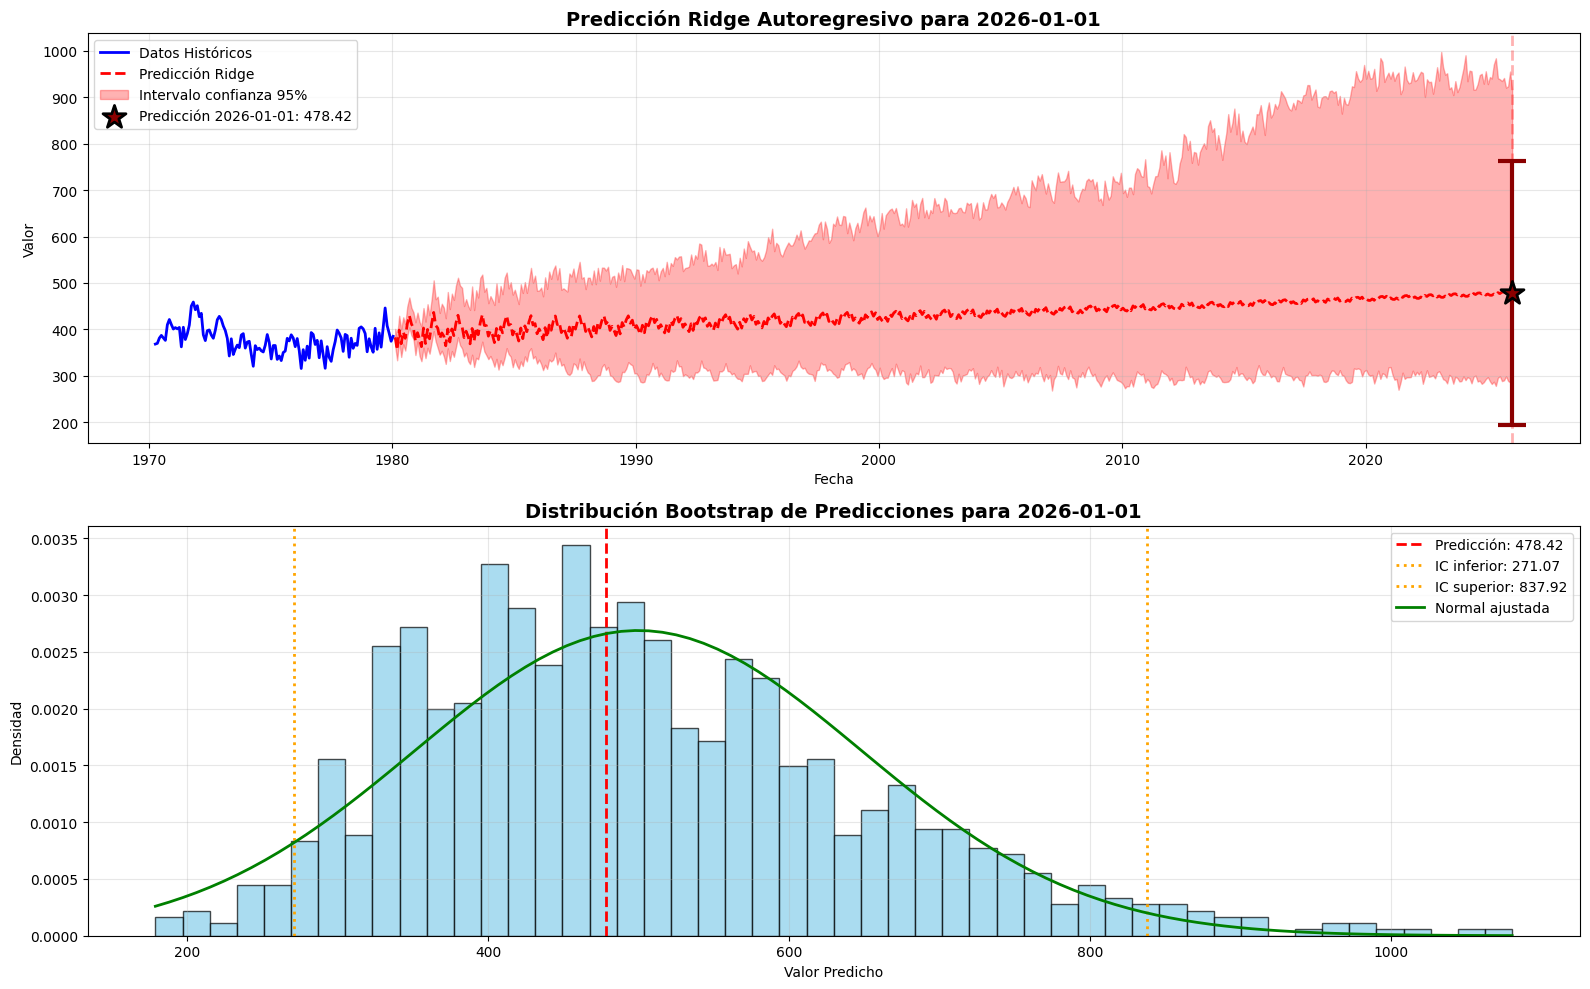

✓ Gráfico guardado en 'prediccion_ridge_2026_completa.png'


In [ ]:
# ========================================
# VISUALIZACIÓN FINAL
# ========================================

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Gráfico 1: Serie completa con predicciones
ultimos_anos = 120  # Últimos 10 años
axes[0].plot(df['date'].tail(ultimos_anos), df['value'].tail(ultimos_anos), 
            label='Datos Históricos', color='blue', linewidth=2)

# Predicciones futuras
axes[0].plot(fechas_futuro, predicciones_futuro, 
            label='Predicción Ridge', color='red', linewidth=2, linestyle='--')

# Intervalo de confianza (aproximado)
# Calcular intervalos para toda la serie futura (no solo 2026)
predicciones_futuro_array = np.array(predicciones_futuro)
limite_inf_serie = predicciones_futuro_array - 2*std_residuos
limite_sup_serie = predicciones_futuro_array + 2*std_residuos

axes[0].fill_between(fechas_futuro, limite_inf_serie, limite_sup_serie,
                     alpha=0.3, color='red', label='Intervalo confianza 95% (aprox)')

# Marcar 2026-01-01
axes[0].scatter([fecha_2026], [prediccion_2026], 
               color='darkred', s=300, zorder=5, marker='*',
               edgecolors='black', linewidths=2,
               label=f'Predicción 2026-01-01: {prediccion_2026:.2f}')

# Barra de error en 2026
axes[0].errorbar(fecha_2026, prediccion_2026, 
                yerr=incertidumbre,
                fmt='none', ecolor='darkred', elinewidth=3, 
                capsize=10, capthick=3, zorder=4)

axes[0].axvline(fecha_2026, color='red', linestyle='--', alpha=0.3, linewidth=2)

axes[0].set_title('Predicción Ridge Autoregresivo para 2026-01-01', 
                 fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Valor')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Distribución Bootstrap de predicciones 2026
axes[1].hist(predicciones_bootstrap, bins=50, density=True, 
            alpha=0.7, color='skyblue', edgecolor='black')

# Línea de predicción puntual
axes[1].axvline(prediccion_2026, color='red', linestyle='--', 
               linewidth=2, label=f'Predicción: {prediccion_2026:.2f}')

# Líneas de intervalos
axes[1].axvline(limite_inferior, color='orange', linestyle=':', 
               linewidth=2, label=f'IC inferior: {limite_inferior:.2f}')
axes[1].axvline(limite_superior, color='orange', linestyle=':', 
               linewidth=2, label=f'IC superior: {limite_superior:.2f}')

# Ajustar distribución normal
mu, sigma = np.mean(predicciones_bootstrap), np.std(predicciones_bootstrap)
x_dist = np.linspace(predicciones_bootstrap.min(), predicciones_bootstrap.max(), 100)
axes[1].plot(x_dist, stats.norm.pdf(x_dist, mu, sigma), 
            'g-', linewidth=2, label='Normal ajustada')

axes[1].set_title('Distribución Bootstrap de Predicciones para 2026-01-01', 
                 fontsize=14, fontweight='bold')
axes[1].set_xlabel('Valor Predicho')
axes[1].set_ylabel('Densidad')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('prediccion_ridge_2026_completa.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado en 'prediccion_ridge_2026_completa.png'")
